# International Phonetic Alphabet - Consonants Visualization
### Anthony Kosinski

This notebook takes consonant phonemes data scraped from Wikipedia and visualizes the data

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading in the IPA Data

In [2]:
ipa_data = pd.read_csv('ipa_collection.csv')

In [3]:
lang_count = len(ipa_data['Language'].unique())
print(f"There are {lang_count} languages in the dataset.")

There are 126 languages in the dataset.


Let's look to see if there are any languages with more consonant phonemes than is reasonable

In [4]:
for lang in ipa_data['Language'].unique():
    cons_count = len(ipa_data[ipa_data['Language'] == lang])
    if cons_count > 100:
        print(lang)

Astur-Leonese
Nguni


Do these languages really have more than 100 different consonant phonemes? Let's double check.

In [5]:
nguni_data = ipa_data[ipa_data['Language'] == 'Nguni']
nguni_ipa_names = []
for i in range(len(nguni_data)):
    #print(f"Name: {nguni_data['Name'].iloc[i]} | Symbol: {nguni_data['Symbol'].iloc[i]}")
    nguni_ipa_names.append(nguni_data['Name'].iloc[i])

In [6]:
nguni_ipa_names = np.array(nguni_ipa_names)

print(len(nguni_ipa_names)) # Nguni Phonemes in ipa_data
print(len(np.unique(nguni_ipa_names))) # Unique Phonemes in Nguni to see if there are duplicates

102
34


It appears that Nguni has duplicate phonemes in the data, but how many languages have this issue?

In [7]:
dup_count = 0
for lang in ipa_data['Language'].unique():
    lang_ph = ipa_data[ipa_data['Language'] == lang]['Name']
    if len(lang_ph) != len(np.unique(lang_ph)):
        dup_count += 1

print(f"There are {dup_count} languages with duplicate phoneme data in ipa_data")

There are 35 languages with duplicate phoneme data in ipa_data


As suspected, there appears to be repeats in the data, in which case the data should be run through once more and cleaned of any repeating phonemes in the same language.

## Removing duplicates

In [8]:
# Setting up new IPA DataFrame with Language, Name, and Symbol columns
new_ipa_data = pd.DataFrame([])
new_ipa_data.insert(0, "Language", [])
new_ipa_data.insert(1, "Name", [])
new_ipa_data.insert(2, "Symbol", [])

# Creating Phoneme Name : Symbol dictionary to make inserting phonemes to new dataframe easier
phoneme_dict = {}
ipa_dd = ipa_data.drop_duplicates(subset=['Name'])
for i in range(len(ipa_dd['Name'])):
    phoneme_dict[ipa_dd['Name'].iloc[i]] = ipa_dd['Symbol'].iloc[i]

# Appending non-duplicated phonemes for each language to new IPA dataframe
dex = 0
for lang in ipa_data['Language'].unique():
    for ph in np.unique(ipa_data[ipa_data['Language'] == lang]['Name']):
        new_ipa_data.loc[dex] = [lang, ph, phoneme_dict[ph]]
        dex += 1
new_ipa_data

,Language,Name,Symbol
0,Standard_German,Glottal stop,ʔ
1,Standard_German,Voiced alveolar approximant,ɹ
2,Standard_German,Voiced alveolar fricative,z
3,Standard_German,Voiced alveolar lateral approximant,l
4,Standard_German,Voiced alveolar nasal,n
...,...,...,...
3093,Zhuang,Voiceless bilabial plosive,p
3094,Zhuang,Voiceless dental fricative,θ
3095,Zhuang,Voiceless glottal fricative,h
3096,Zhuang,Voiceless labiodental fricative,f


Let's check our new dataframe to make sure it doesn't have the same duplication issues as before.

In [9]:
dup_count = 0
for lang in new_ipa_data['Language'].unique():
    lang_ph = new_ipa_data[new_ipa_data['Language'] == lang]['Name']
    if len(lang_ph) != len(np.unique(lang_ph)):
        dup_count += 1

print(f"There are {dup_count} languages with duplicate phoneme data in new_ipa_data")

There are 0 languages with duplicate phoneme data in new_ipa_data


Success! We've removed the duplicate phoneme data from the IPA data.

## Plotting

Lets plot our data to find which languages have the most consonant phonemes, and which consonant phonemes are the most common!

In [48]:
lang_count_data = pd.DataFrame([])
lang_count_data.insert(0, "Language", [])
lang_count_data.insert(1, "Phonemes", [])

# Creating a dataframe with the number of phonemes in each language.
dex = 0
for lang in new_ipa_data['Language'].unique():
    dex += 1
    cons_count = len(new_ipa_data[new_ipa_data['Language'] == lang])
    lang_count_data.loc[dex] = [lang, cons_count]
        
lang_count_data = lang_count_data.sort_values('Phonemes', ascending=False)

[Text(0, 0.5, 'Consonant Phonemes'),
 Text(0.5, 1.0, 'Languages with most Consonant Phonemes')]

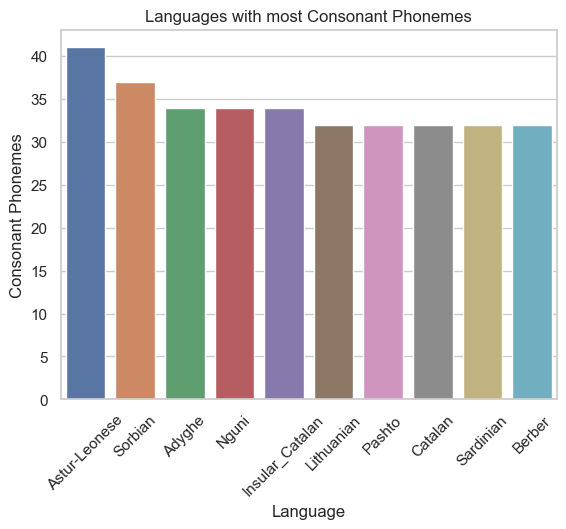

In [116]:
# Set Plot Theme
sns.set_theme(style='whitegrid')

# Seaborn Plot
ph_plot = sns.barplot(lang_count_data, x=lang_count_data['Language'][0:10], y=lang_count_data['Phonemes'][0:10])
ph_plot.tick_params(axis='x', labelrotation=45)
ph_plot.set(ylabel="Consonant Phonemes", title="Languages with most Consonant Phonemes")

According to our scraped IPA data, Astur-Leonese has the most consonant phonemes. However this may be due to the fact that Astur-Leonese is actually a categorization for three related languages.

In [117]:
ph_count_data = pd.DataFrame([])
ph_count_data.insert(0, "Name", []) # We won't be labelling with the phoneme's name, but useful to have if needed
ph_count_data.insert(1, "Symbol", []) # The IPA Symbol corresponding to the phoneme
ph_count_data.insert(2, "Count", []) # Number of occurances in dataset
ph_count_data.insert(3, "Manner", []) # We'll use this for later plots

# Creating a dataframe with number of overall phoneme occurances in the data
dex = 0
for ph in phoneme_dict:
    ph_count = len(new_ipa_data[new_ipa_data['Name'] == ph])
    ph_count_data.loc[dex] = [ph, phoneme_dict[ph], ph_count, ph.split(' ')[-1]]
    dex += 1
    
ph_count_data = ph_count_data.sort_values('Count', ascending=False)

[Text(0, 0.5, 'Occurances'), Text(0.5, 1.0, 'Most Common Consonant Phonemes')]

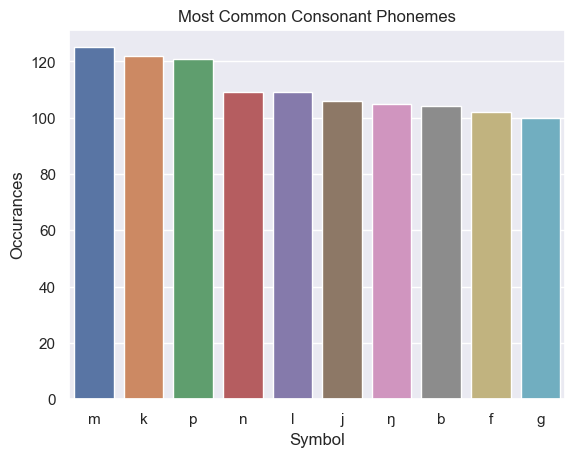

In [118]:
sb.set_theme(style='darkgrid')

# Seaborn plot
ph_plot = sns.barplot(ph_count_data, x=ph_count_data['Symbol'][0:10], y=ph_count_data['Count'][0:10])
ph_plot.tick_params(axis='x', labelrotation=0)
ph_plot.set(ylabel="Occurances", title="Most Common Consonant Phonemes")

It appears the most common phoneme is the voiced bilabial nasal "m", followed closely by the voiceless velar plosive "k", and the voiceless bilabial plosive "p".

## Other Plots

For this plot, let's seperate the phonemes based off of their manner of articulation.

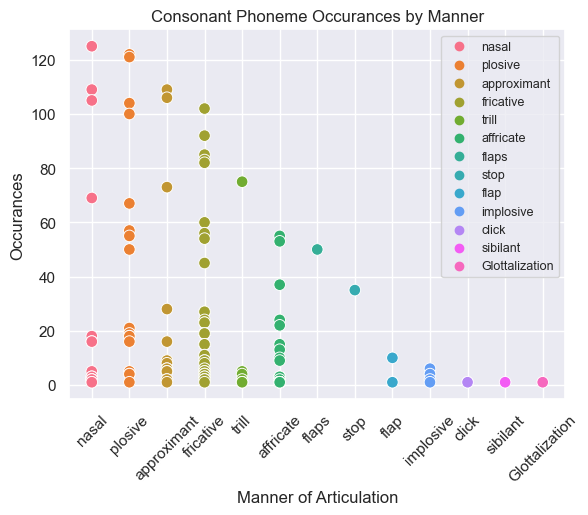

In [147]:
ph_count_data

mnr_plot = sns.scatterplot(data = ph_count_data, x = 'Manner', y='Count', hue='Manner', s=70)
mnr_plot.tick_params(axis='x', labelrotation=45)
mnr_plot.set(xlabel="Manner of Articulation", ylabel="Occurances", title="Consonant Phoneme Occurances by Manner")
mnr_plot.legend(fontsize=9)

While a nasal phoneme is the most common phoneme, there are more common fricative phonemes than nasal phonemes!

# Conclusions

It seems the most common consonant phoneme is the voiced bilabial nasal "m". However, there are more consonant phonemes with a fricative manner of articulation which are overall more commonly found in various languages than the overall nasal phonemes.

### Notes
The scraped data is not 100% accurate, as the scraper may have missed some consonant phonemes for certain languages where their page was slightly differently formatted.

More plots could be made exploring the place of articulation as well as comparing voiced to voiceless consononants.